# Text Analytics and Sentimental Analysis

![image](https://image.slidesharecdn.com/capstoneprojectgadatasciencelinm-160512021206/95/sentiment-analysis-of-airline-tweets-1-638.jpg?cb=1463019310)

In [1]:
!pip install HTMLParser
!pip install WordCloud

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Import Required Libraries
import pandas as pd
import os
import reS
import numpy as np

import nltk
nltk.download() # After running this kernel you need to close the NLTK downloader window which pops up to further progress with the code
from nltk.tokenize import word_tokenize

import html
from html.parser import HTMLParser

# Data Visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


## changing directory

In [3]:
os.chdir(r'C:\Users\ganes\Desktop\Semester 3\MIE 1624 Introduction to Data Science and Analysis\Assignment 1')

# Cleaning Generic_Tweets

For cleaning the data I have used 'html parser' to convert the html character codes to ASCII equivalent and 'regular expression' library to clean the data from alpha numeric symbols, white spaces, URL's and converting the text to lower case. I have used NLTK word_tokenizer to tokenize the words of the text and I have removed the stopwords file given in the assignment from the text of the US_Airlines data set.

In [4]:
generic_df = pd.read_csv('generic_tweets.txt')
generic_df
generic_df = generic_df.drop(['id','date','query','user'],axis =1)

def clean_tweet(tweet):
    hparser=HTMLParser()  
    new_text=html.unescape(tweet)  # converts HTML character codes to ASCII equivalent
    lower_case = new_text.lower()  # converts all the letters to lower case
    spaces = re.sub('[\s]+', ' ', lower_case) # Removes the spaces
    link = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',spaces) # Removes the URL's
    alpha_numeric = re.sub('[^a-zA-Z\s]+', '', link) # Removes the alpha numeric symbols
    with open('stop_words.txt', 'r') as stop_words_file: # Used the given stopwords list in the assignment
        stop_words = stop_words_file.readlines()
    stop_words_list = list(map(lambda x:x.strip(),stop_words))   
    word_tokens = word_tokenize(alpha_numeric) # Tokenizes the text
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words_list: 
            filtered_sentence.append(w)
    return filtered_sentence

clean_text = generic_df['text'].apply(lambda tweet: clean_tweet(tweet)) # Applies above changes made to all the tweets in the data set
generic_df['cleaned_tweets'] = clean_text
generic_df['cleaned_tweets']
generic_df.head()

,class,text,cleaned_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfoot, awww, bummer, shoulda, david, car..."
1,0,is upset that he can't update his Facebook by ...,"[upset, cant, update, facebook, texting, cry, ..."
2,0,@Kenichan I dived many times for the ball. Man...,"[kenichan, dived, times, ball, managed, save, ..."
3,0,my whole body feels itchy and like its on fire,"[body, feels, itchy, fire]"
4,0,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behaving, mad, cant]"


# Cleaning US_Airline_tweets

For cleaning the data I have used 'html parser' to convert the html character codes to ASCII equivalent and 'regular expression' library to clean the data from alpha numeric symbols, white spaces, URL's and converting the text to lower case. I have used NLTK word_tokenizer to tokenize the words of the text and I have removed the stopwords file given in the assignment from the text of the US_Airlines data set.

In [5]:
US_airlines_df = pd.read_csv('US_airline_tweets.csv')
US_airlines_df = US_airlines_df.drop(['id','user','retweet_count'],axis =1)

def clean_airline_tweet(airline_tweet):
    hparser=HTMLParser()
    new_text=html.unescape(airline_tweet)   # converts HTML character codes to ASCII equivalent
    lower_case = new_text.lower()           # converts all the letters to lower case
    spaces = re.sub('[\s]+', ' ', lower_case) # Removes the spaces
    link = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',spaces) # Removes the URL's
    alpha_numeric = re.sub('[^a-zA-Z\s]+', '', link) # Removes the alpha numeric symbols
    with open('stop_words.txt', 'r') as stop_words_file: # Used the given stopwords list in the assignment
        stop_words = stop_words_file.readlines()
    stop_words_list = list(map(lambda x:x.strip(),stop_words))   
    word_tokens = word_tokenize(alpha_numeric)   # Tokenizes the text
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words_list: 
            filtered_sentence.append(w)
    return filtered_sentence

US_airlines_df['cleaned_tweets'] = US_airlines_df['text'].apply(lambda airline_tweet: clean_airline_tweet(airline_tweet)) # Applies above changes made to all the tweets in the data set
US_airlines_df['cleaned_tweets']
US_airlines_df.head()

,sentiment,negative_reason,text,cleaned_tweets
0,positive,NaN,@VirginAmerica plus you've added commercials t...,"[virginamerica, youve, commercials, experience..."
1,negative,Bad Flight,@VirginAmerica it's really aggressive to blast...,"[virginamerica, aggressive, blast, obnoxious, ..."
2,negative,Can't Tell,@VirginAmerica and it's a really big bad thing...,"[virginamerica, big, bad, thing]"
3,negative,Can't Tell,@VirginAmerica seriously would pay $30 a fligh...,"[virginamerica, seriously, pay, flight, seats,..."
4,positive,NaN,"@VirginAmerica yes, nearly every time I fly VX...","[virginamerica, time, fly, vx, ear, worm]"


# Exploratory Analysis

Here I asumed that the number of tweets and passengers using that particular airlines are proprtional. 

In this section I have designed a simple procedure to determine the airline of a given tweet and I have plotted two graphs:
 1. Distribution of US Airlines of the tweets.
 2. Class distribution of generic tweets.
 3. Plotted wordclouds for negative and positive sentiment tweets for the given US_Airlines dataset.

In [6]:
# Finding airline name for each tweet

airlines = ['virginamerica','united','southwestair','jetblue','usairways','americanair']

def tweets_airline(tweet):
    for i in airlines: 
        if i in tweet:
            return i # Returns airline to every tweet in the data set

US_airlines_df['airlines'] = US_airlines_df['cleaned_tweets'].apply(lambda airline_tweet: tweets_airline(airline_tweet))
US_airlines_df['airlines'].value_counts() 

united           3169
usairways        2561
americanair      2200
southwestair     1756
jetblue          1492
virginamerica     341
Name: airlines, dtype: int64

Text(0.5,1,'Distribution of the US airlines of the tweets')

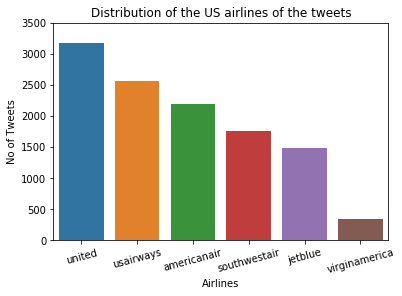

In [7]:
# 1.  Distribution of the US airlines of the tweets

x = ['united', 'usairways', 'americanair', 'southwestair', 'jetblue', 'virginamerica']
y = US_airlines_df['airlines'].value_counts() 
ax = sns.barplot(x=x,y=y)
ax.set(ylim=(0, 3500), ylabel="No of Tweets",
       xlabel="Airlines")
plt.xticks(rotation=15)
plt.title('Distribution of the US airlines of the tweets')

As per my assumption stated above I can say that most of the people used United airways for travelling.

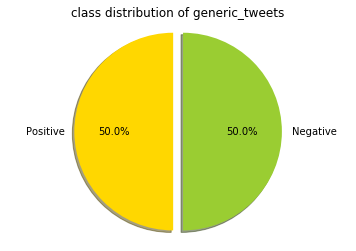

In [8]:
# 2. Pie chart to show the class distribution of generic_tweets

labels = 'Positive','Negative'
sizes = generic_df['class'].value_counts()
colors = ['gold', 'yellowgreen']
# explode 1st slice
explode = (0.1, 0)  
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('class distribution of generic_tweets')
plt.show()

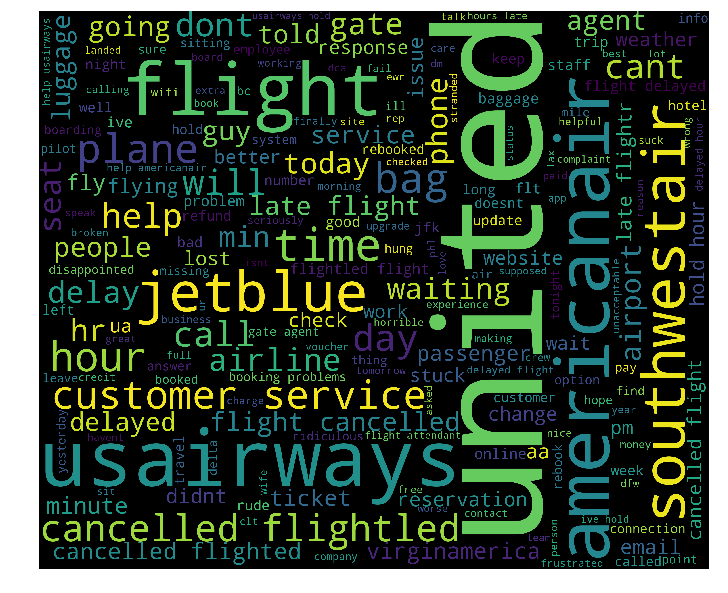

In [9]:
# 3. Word cloud for the negative tweets of US_Airlines

df_negative = US_airlines_df[US_airlines_df['sentiment'] == 'negative']
df1_negative = df_negative['cleaned_tweets'].apply(lambda x: " ".join(str(e) for e in x)) # Data Frame of cleaned tweets with negative sentiment
words_negative = pd.Series(df1_negative).str.cat(sep=' ') # Concatenate strings in the Series/Index with None separator.
cleaned_word_negative = " ".join([word for word in words_negative.split()]) # Splitting the words
wordcloud_negative = WordCloud( background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_negative)

# Plotting word cloud
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_negative)
plt.axis('off')
plt.show()

From the above word cloud we could say that since all the airline names frequency is higher it is clear that they are bigger in size and we can see other negative words like "cancelled flight, don't, can't, delay,frustrated" have significant frequency in the wordcloud.

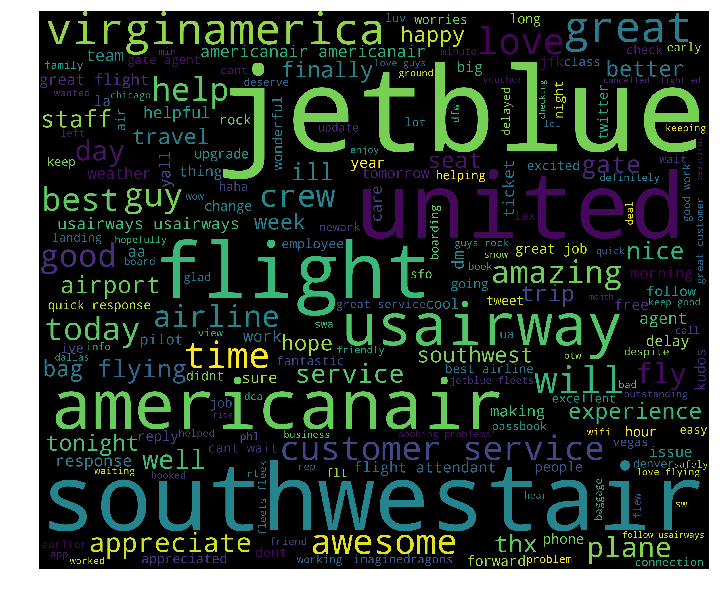

In [10]:
# 3. Word cloud for the positive tweets

df_positive = US_airlines_df[US_airlines_df['sentiment'] == 'positive']
df1_positive = df_positive['cleaned_tweets'].apply(lambda x: " ".join(str(e) for e in x)) # Data Frame of cleaned tweets with positive sentiment
words_positive = pd.Series(df1_positive).str.cat(sep=' ') # Concatenate strings in the Series/Index with None separator.
cleaned_word_positive = " ".join([word for word in words_positive.split()]) # Splitting the words
wordcloud_positive = WordCloud( background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_positive)

# Plotting word cloud
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.show()

From the above word cloud we could say that since all the airline names frequency is higher it is clear that they are bigger in size and we can see other positive words like "good, awesome, amazing, awesome,nice,happy" have significant frequency in the wordcloud.

# Model Preparation 



In [11]:
# Using Count vectorizer and looping over different algorithms

# Converting list of cleaned generic_tweets into a string
string_text_generic = generic_df['cleaned_tweets'].apply(lambda x: " ".join(str(e) for e in x))
text_generic = string_text_generic

# Using Count Vectorization to tokenize the words and give the count of the words
vectorizer = CountVectorizer(stop_words="english", analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)
vectorizer.fit(text_generic)
txt_fitted_generic_CV = vectorizer.fit_transform(text_generic)

# Splitting features
X = txt_fitted_generic_CV
generic_df['class_score'] = generic_df['class'].apply(lambda x:1 if x == 4 else 0) # converting binary value of 4 to 1
y = generic_df['class_score']

# Splitting the dataset into training/testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Defining a function for the performance comparison of different algorithms
def algorithm_accuracy(X_train, X_test, y_train, y_test):
    models = []
    models.append(('LogR', LogisticRegression()))
    models.append(('BNB', BernoulliNB()))
    models.append(('MNB', MultinomialNB()))
                
    results = []
    names = []
    for name,modelname in models:
        model = modelname
        model = model.fit(X_train,y_train) # Training the model
        y_predict = model.predict(X_test) # Predicting the test data
        score = accuracy_score(y_test,y_predict) #Evaluating the accuracy of the model
        names.append(name)
        print(name)
        print(classification_report(y_test,y_predict))
        print('------------------------------------------')
        results.append(score)
        
        cm = confusion_matrix(y_predict, y_test) # Finding the confusing matrix for the first model
        print(cm)
        print(y_predict)
        print('------------------------------------------')
    print(names)
    print(results) 
    return results
      
# calling the function
algorithm_accuracy(X_train,X_test, y_train, y_test) 

LogR
             precision    recall  f1-score   support

          0       0.75      0.71      0.73     30094
          1       0.72      0.77      0.75     29906

avg / total       0.74      0.74      0.74     60000

------------------------------------------
[[21336  6935]
 [ 8758 22971]]
[1 0 0 ... 1 0 1]
------------------------------------------
BNB
             precision    recall  f1-score   support

          0       0.72      0.77      0.74     30094
          1       0.75      0.70      0.72     29906

avg / total       0.73      0.73      0.73     60000

------------------------------------------
[[23035  8972]
 [ 7059 20934]]
[0 0 0 ... 1 0 0]
------------------------------------------
MNB
             precision    recall  f1-score   support

          0       0.72      0.76      0.74     30094
          1       0.74      0.71      0.72     29906

avg / total       0.73      0.73      0.73     60000

------------------------------------------
[[22803  8763]
 [ 7291 21143]

[0.73845, 0.7328166666666667, 0.7324333333333334]

In [12]:
# Using tfidf classifier and looping over different algorithms

# Using tfidf to tokenize the words and give score to the words 
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(text_generic)
txt_fitted_generic_tfidf = tf.fit_transform(text_generic)

# Splitting features
X = txt_fitted_generic_tfidf
generic_df['class_score'] = generic_df['class'].apply(lambda x:1 if x == 4 else 0) # converting binary value of 4 to 1
y = generic_df['class_score']

# Splitting the dataset into training/testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# calling the algorithm_accuracy function
algorithm_accuracy(X_train,X_test, y_train, y_test) 

LogR
             precision    recall  f1-score   support

          0       0.70      0.73      0.71     30163
          1       0.71      0.68      0.69     29837

avg / total       0.70      0.70      0.70     60000

------------------------------------------
[[22002  9635]
 [ 8161 20202]]
[1 1 0 ... 1 0 0]
------------------------------------------
BNB
             precision    recall  f1-score   support

          0       0.73      0.77      0.75     30163
          1       0.75      0.71      0.73     29837

avg / total       0.74      0.74      0.74     60000

------------------------------------------
[[23230  8790]
 [ 6933 21047]]
[1 1 0 ... 0 0 1]
------------------------------------------
MNB
             precision    recall  f1-score   support

          0       0.69      0.75      0.72     30163
          1       0.72      0.66      0.69     29837

avg / total       0.71      0.71      0.71     60000

------------------------------------------
[[22609 10050]
 [ 7554 19787]

[0.7034, 0.73795, 0.7066]

### Interpretation from model

I have prepared a  model using count vectorizer and tfidf classifiers and ran them over loop for algorithms like Logistic regression, Bernoulli Naive Bayes, Multinomial NB. I observed that the Count Vectorizer gives a better accuracy for the algorithms I have taken. The reason is, in Count Vectorization the classifier counts the number of times a particular word is used in that sentence where as tfidf gives the uniqueness of that word in the whole data set. In sentimental analysis we just need to convey whether the text is positive or negative so, the uniqueness of the term isn't that important. Therefore, I intend to use the Count Vectorizing Classifier in further coding. 

# Model Implementation

In [13]:
# Converting list of cleaned airlines_tweets into a string

string_text_airlines = US_airlines_df['cleaned_tweets'].apply(lambda x: " ".join(str(e) for e in x))
text_airlines = string_text_airlines

# Transforming the US_Airlines tweets
txt_fitted_airlines_CV = vectorizer.transform(text_airlines)

# Defining the X and y values
X = txt_fitted_generic_CV
generic_df['class_score'] = generic_df['class'].apply(lambda x:1 if x == 4 else 0)
y = generic_df['class_score']

# converting sentiment column of US_airlines to binary digits
US_airlines_df['score'] = US_airlines_df['sentiment'].apply(lambda x:1 if x == 'positive' else 0) 
US_airlines_df['score'].head()
y_test = US_airlines_df['score']
X_test = txt_fitted_airlines_CV

# Calling the algorithm_accuracy function
result_1 = algorithm_accuracy(X, txt_fitted_airlines_CV, y, US_airlines_df['score'])

LogR
             precision    recall  f1-score   support

          0       0.92      0.76      0.83      9178
          1       0.44      0.73      0.55      2363

avg / total       0.82      0.75      0.77     11541

------------------------------------------
[[6933  634]
 [2245 1729]]
[1 1 0 ... 0 0 0]
------------------------------------------
BNB
             precision    recall  f1-score   support

          0       0.89      0.81      0.85      9178
          1       0.46      0.62      0.53      2363

avg / total       0.80      0.77      0.78     11541

------------------------------------------
[[7444  892]
 [1734 1471]]
[1 1 0 ... 0 0 0]
------------------------------------------
MNB
             precision    recall  f1-score   support

          0       0.89      0.81      0.85      9178
          1       0.45      0.62      0.52      2363

avg / total       0.80      0.77      0.78     11541

------------------------------------------
[[7398  889]
 [1780 1474]]
[1 1 0 ...

Text(0.5,1,'Comparison of the accuracies of different algorithms for US_airline tweets')

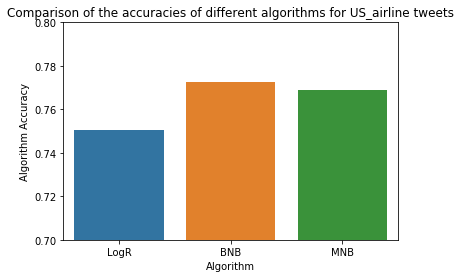

In [14]:
# Comparison of the accuracies of different algorithms for US_airline tweets

x = ['LogR', 'BNB', 'MNB', ]
y = result_1
ax = sns.barplot(x=x,y=y)
ax.set(ylim=(0.7, 0.8), ylabel="Algorithm Accuracy",
       xlabel="Algorithm")
plt.title('Comparison of the accuracies of different algorithms for US_airline tweets')

I have got similar accuracies for the three models I have used. Even we can check this from Confusion matrix values as True Positive and True Negative values of the confusion matrix are almost similar for every model used so, I am considering one of the model and checking the predicted results to give my intuition on the results. 

In [15]:
# Running the Bernoulli NB model to check the predicted US_Airline tweets

model = BernoulliNB()
model = model.fit(txt_fitted_generic_CV,generic_df['class_score']) # Training the model
y_predict = model.predict(txt_fitted_airlines_CV)
Predicted_sentiment = pd.DataFrame({'sentiment':y_predict})
US_airlines_df['Predicted_sentiment'] = Predicted_sentiment
US_airlines_df['Predicted_sentiment']
US_airlines_df.head()

,sentiment,negative_reason,text,cleaned_tweets,airlines,score,Predicted_sentiment
0,positive,NaN,@VirginAmerica plus you've added commercials t...,"[virginamerica, youve, commercials, experience...",virginamerica,1,1
1,negative,Bad Flight,@VirginAmerica it's really aggressive to blast...,"[virginamerica, aggressive, blast, obnoxious, ...",virginamerica,0,1
2,negative,Can't Tell,@VirginAmerica and it's a really big bad thing...,"[virginamerica, big, bad, thing]",virginamerica,0,0
3,negative,Can't Tell,@VirginAmerica seriously would pay $30 a fligh...,"[virginamerica, seriously, pay, flight, seats,...",virginamerica,0,0
4,positive,NaN,"@VirginAmerica yes, nearly every time I fly VX...","[virginamerica, time, fly, vx, ear, worm]",virginamerica,1,1


## Multi class logistic regression

Firstly I have shown the value counts for the classes of the negative_reasons  and then plotted for top 5 classes of negative reasons.

For analysing this multi class negative_reasons for the US_Airline tweets I have considered two cases:
1. I have converted all the negative_reasons into numbers from 0-10. Here I have numbered the empty classes of negative_reasons column as 0 and then ran the model.
2. As suggested I have grouped some of the classes which I felt are of similar kind of reasons like 
list1 = ['Bad Flight' , 'Late Flight' , 'Cancelled Flight']
list2 = ['Flight Booking Problems' , 'Customer Service Issue','Flight Attendant Complaints','longlines']
list3 = ['Lost Luggage','Damaged Luggage']
I have grouped the reason "Can't tell" and the tweets which doesn't have any reason as a group and then ran the model.
I have plotted a graph for the above two cases and it is clear that grouping classes of negative_reason was a better decision and it improves the model. The reason could be since I have grouped the classes of negative_reasons the chance of predicting the negative_reason for the tweet would be highly substantial when compared to predicting in a one particular class of negative_reason.

In [16]:
# Finding out the classes of the negative_reasons
US_airlines_df['negative_reason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negative_reason, dtype: int64

In [17]:
# Finding out the top 5 classes of the negative_reasons
US_airlines_df['negative_reason'].value_counts().head()

Customer Service Issue    2910
Late Flight               1665
Can't Tell                1190
Cancelled Flight           847
Lost Luggage               724
Name: negative_reason, dtype: int64

Text(0,0.5,'No. of Tweets')

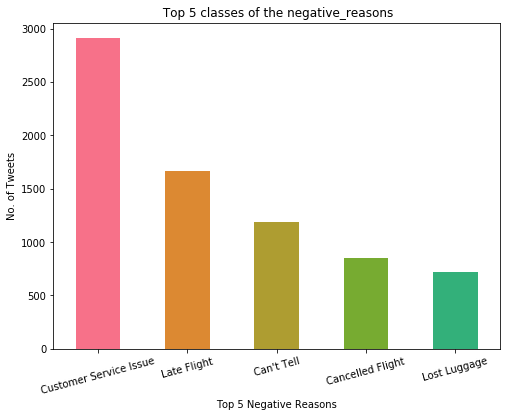

In [18]:
# Plotting the top 5 classes of the negative_reasons

color=sns.color_palette("husl", 10)
pd.Series(US_airlines_df['negative_reason'].value_counts().head().plot(kind = "bar",
                        color=color,figsize=(8,6),title = " Top 5 classes of the negative_reasons"))
plt.xlabel('Top 5 Negative Reasons', fontsize=10)
plt.xticks(rotation=15)
plt.ylabel('No. of Tweets', fontsize=10)

In [19]:
# 1. Converting list of cleaned generic_tweets into a string

string_text_airlines = US_airlines_df['cleaned_tweets'].apply(lambda x: " ".join(str(e) for e in x))
text_airlines = string_text_airlines

# Using Count Vectorization to tokenize the words and give the count of the words
vectorizer = CountVectorizer(stop_words="english", analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)
vectorizer.fit(text_airlines)
txt_fitted_airlines_CV = vectorizer.fit_transform(text_airlines)

# Converting the classes of negative_reasons to digits from 0-10 (o being no class)
d = dict()
counter = 0
reasons = US_airlines_df['negative_reason']
for reason in reasons:
    if reason in d:
        continue
    d[reason] = counter
    counter += 1
US_airlines_df['negative_reason_score'] = [d[reason] for reason in reasons]

#Defining the X and y values
X = txt_fitted_airlines_CV
y = US_airlines_df['negative_reason_score']

# Splitting the dataset into training/testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# calling the function
result_2 = algorithm_accuracy(X_train,X_test, y_train, y_test) 

LogR
             precision    recall  f1-score   support

          0       0.61      0.79      0.69       711
          1       0.49      0.34      0.40       173
          2       0.39      0.29      0.33       363
          3       0.65      0.67      0.66       482
          4       0.60      0.68      0.64       876
          5       0.41      0.24      0.31       147
          6       0.64      0.64      0.64       211
          7       0.53      0.31      0.39       149
          8       0.70      0.70      0.70       268
          9       1.00      0.12      0.21        26
         10       0.36      0.07      0.12        57

avg / total       0.58      0.59      0.58      3463

------------------------------------------
[[562  30 114  42  86  17  28  17  10   7   8]
 [  6  58  16  11   6   5   1   7   4   0   4]
 [ 18  21 106  13  60  18   9  11   9   3   3]
 [ 25  33  15 324  39   9   9   8  21   0  12]
 [ 60  20  92  61 599  50  21  48  27   4  11]
 [  4   2   8   1  30  36

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
# 2. Converting list of cleaned generic_tweets into a string

string_text_airlines = US_airlines_df['cleaned_tweets'].apply(lambda x: " ".join(str(e) for e in x))
text_airlines = string_text_airlines

# Using Count Vectorization to tokenize the words and give the count of the words
vectorizer = CountVectorizer(stop_words="english", analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)
vectorizer.fit(text_airlines)
txt_fitted_airlines_CV = vectorizer.fit_transform(text_airlines)

# Grouping neagtive_reason classes 
list1 = ['Bad Flight' , 'Late Flight' , 'Cancelled Flight']
list2 = ['Flight Booking Problems' , 'Customer Service Issue','Flight Attendant Complaints','longlines']
list3 = ['Lost Luggage','Damaged Luggage']

negative_reasons_score =[]
reasons = US_airlines_df['negative_reason']
for reason in reasons:
    if reason in list1:
        negative_reasons_score.append(1)
    elif reason in list2:
        negative_reasons_score.append(2)
    elif reason in list3:
        negative_reasons_score.append(3)
    else:
        negative_reasons_score.append(0)

US_airlines_df['negative_reason_score_grouped'] = negative_reasons_score
        
#Defining the X and y values
X = txt_fitted_airlines_CV
y = US_airlines_df['negative_reason_score_grouped']

# Splitting the dataset into training/testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# calling the function
result_3 = algorithm_accuracy(X_train,X_test, y_train, y_test) 

LogR
             precision    recall  f1-score   support

          0       0.68      0.76      0.71      1057
          1       0.75      0.68      0.72       929
          2       0.72      0.71      0.72      1213
          3       0.68      0.60      0.63       264

avg / total       0.71      0.71      0.71      3463

------------------------------------------
[[802 140 199  46]
 [ 70 634 114  22]
 [163 135 866  38]
 [ 22  20  34 158]]
[1 2 0 ... 0 0 0]
------------------------------------------
BNB
             precision    recall  f1-score   support

          0       0.66      0.77      0.71      1057
          1       0.72      0.65      0.68       929
          2       0.65      0.75      0.70      1213
          3       0.67      0.01      0.01       264

avg / total       0.67      0.67      0.64      3463

------------------------------------------
[[809 141 186  81]
 [ 61 601 115  62]
 [187 186 912 119]
 [  0   1   0   2]]
[1 2 2 ... 0 0 0]
------------------------------

Text(0.5,1,'Comparison of the accuracies of two cases of multi class')

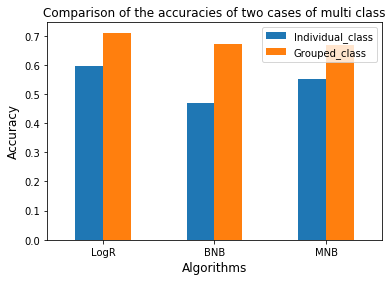

In [21]:
# Comparison of the accuracies of two cases of multi class

x = ['LogR', 'BNB', 'MNB']
Individual_class = result_2 # result of individual classes of negative_reason
Grouped_class = result_3 # result of grouping classes of negative_reason
df = pd.DataFrame({'x':x, 'Individual_class':Individual_class, 'Grouped_class':Grouped_class})
df[["x", "Individual_class", "Grouped_class"]].plot(x="x", kind="bar")
plt.xlabel('Algorithms', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of the accuracies of two cases of multi class')

It is clear from the graph that grouping of the classes of negative_reason would improve the accuracy of the model

# Discussion 

Answer the research question (What can public opinion on Twitter tell us about the US airlines in 2015 ) stated above based on the outputs of your first model. Describe the results of the analysis and discuss your interpretation of the results. Explain how each airline is viewed in the public eye based on the sentiment value. For the second model, provide a few reasons why your model failed to predict the correct negative reasons. Back up your reasoning with examples from the test sets. For both models, suggest one way you can improve the accuracy of your models? 

I have briefly described each question in the following manner:

Firstly I have shown the results of the model 1 and then answered the questions


I have got similar accuracies for the three models I have used. Even we can check this from Confusion matrix values as True Positive and True Negative values of the confusion matrix are almost similar for every model used so, I am considering one of the model and checking the predicted results to give my intuition on the results. 

Sentiment for each airline based on prediction (model 1)

In [22]:
# Finding out the sentiment values for each airline based on prediction results using Bernouli NB model

# Finding out the sentiment values for VirginAmerica
VA_positive = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 1) & (US_airlines_df['airlines'] == 'virginamerica')]
VA_negative = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 0) & (US_airlines_df['airlines'] == 'virginamerica')]

# Finding out the sentiment values for JetBlue
JB_positive = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 1) & (US_airlines_df['airlines'] == 'jetblue')]
JB_negative = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 0) & (US_airlines_df['airlines'] == 'jetblue')]

# Finding out the sentiment values for SouthWestAir
SWA_positive = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 1) & (US_airlines_df['airlines'] == 'southwestair')]
SWA_negative = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 0) & (US_airlines_df['airlines'] == 'southwestair')]

# Finding out the sentiment values for AmericanAir
AA_positive = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 1) & (US_airlines_df['airlines'] == 'americanair')]
AA_negative = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 0) & (US_airlines_df['airlines'] == 'americanair')]

# Finding out the sentiment values for UnitedAir
UA_positive = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 1) & (US_airlines_df['airlines'] == 'usairways')]
UA_negative = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 0) & (US_airlines_df['airlines'] == 'usairways')]

# Finding out the sentiment values for United
U_positive = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 1) & (US_airlines_df['airlines'] == 'united')]
U_negative = US_airlines_df[(US_airlines_df['Predicted_sentiment'] == 0) & (US_airlines_df['airlines'] == 'united')]

Predicted_sentiment_airline = {'Predicted_Positive_review': [len(VA_positive),len(JB_positive),len(SWA_positive),len(AA_positive),len(UA_positive),len(U_positive)],
                     'Predicted_Negative_review':[len(VA_negative),len(JB_negative),len(SWA_negative) ,len(AA_negative),len(UA_negative),len(U_negative)],
                    'Total':[ len(VA_positive+VA_negative),len(JB_positive+JB_negative),len(SWA_positive+SWA_negative),len(AA_positive+AA_negative),
                             len(UA_positive+UA_negative),len(U_positive+U_negative)],
                     'Positive_percent':[len(VA_positive)/len(VA_positive+VA_negative)*100,len(JB_positive)/len(JB_positive+JB_negative)*100,len(SWA_positive)/len(SWA_positive+SWA_negative)*100,len(AA_positive)/len(AA_positive+AA_negative)*100,
                    len(UA_positive)/len(UA_positive+UA_negative)*100,len(U_positive)/len(U_positive+U_negative)*100],
                    'Negative_percent': [len(VA_negative)/len(VA_positive+VA_negative)*100,len(JB_negative)/len(JB_positive+JB_negative)*100,len(SWA_negative)/len(SWA_positive+SWA_negative)*100,len(AA_negative)/len(AA_positive+AA_negative)*100,
                     len(UA_negative)/len(UA_positive+UA_negative)*100,len(U_negative)/len(U_positive+U_negative)*100]}

Predicted_sentiment_airline_df = pd.DataFrame.from_dict(Predicted_sentiment_airline)
airlines = ['virginamerica','jetblue','southwestair','americanair','usairways','united']
Predicted_sentiment_airline_df['Airline'] =  airlines

In [23]:
Predicted_sentiment_airline_df

,Predicted_Positive_review,Predicted_Negative_review,Total,Positive_percent,Negative_percent,Airline
0,165,176,341,48.387097,51.612903,virginamerica
1,1000,492,1492,67.024129,32.975871,jetblue
2,247,1509,1756,14.066059,85.933941,southwestair
3,557,1643,2200,25.318182,74.681818,americanair
4,303,2258,2561,11.831316,88.168684,usairways
5,922,2247,3169,29.094352,70.905648,united


Text(0.5,1,'Comparison of the Predicted_sentiment of the airlines')

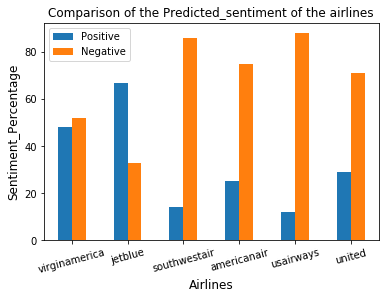

In [24]:
# Comparison of the Predicted_sentiment of the airlines

x =  ['virginamerica','jetblue','southwestair','americanair','usairways','united']
Positive = [48,67,14,25,12,29] # Positive_percent
Negative = [52,33,86,75,88,71] # Negative_percent
df = pd.DataFrame({'x':x, 'Positive':Positive, 'Negative':Negative})
df[["x", "Positive", "Negative"]].plot(x="x", kind="bar")
plt.xlabel('Airlines', fontsize=12)
plt.xticks(rotation=15)
plt.ylabel('Sentiment_Percentage', fontsize=12)
plt.title('Comparison of the Predicted_sentiment of the airlines')

#### Answer the research question (What can public opinion on Twitter tell us about the US airlines in 2015 ) stated above based on the outputs of your first model. Describe the results of the analysis and discuss your interpretation of the results.

Public Opinion based on the predicted results from first model says that most of the passengers used United airlines for their travel but the negative reviews are more than the positive reviews for this airline.Even though less number of passengers used Virgin America airlines the ratio of reviews is almost proportional. Results show that Jet Blue airlines has most positive reviews and US Airways has most negative reviews. According to the pattern observed I feel that most of the travellers had used Twitter as their medium to exprees the negative reviews of the airlines rather than positive reviews. This might be due to the feeling that the Twitter is most widely used Social Media around the world and the tweets in this medium become quite popular very easily just like "Trump Tweets".The tweets might get recognized which might lead to the intitiation of proper action in US_Airlines for example. 


#### Explain how each airline is viewed in the public eye based on the sentiment value
From the above data frame and graph it is clear that all the airlines had more negative reviews comparitively to the positive reviews. Even though most of the passengers boarded United but they had pretty bad experience with the ailrines, whereas the Jet Blue airlines had highly positive reviews when compared to other airlines. I reckon Jet Blue airlines are providing very good customer service. Even though Virgin Amercica Airlines had least number of passengers as per the assumption made in the model preparation section the ratio of positive and negative reviews are proportional.

#### For the second model, provide a few reasons why your model failed to predict the correct negative reasons.Back up your reasoning with examples from the test sets
The reason could be the model might have got confused with the classes like damaged luggage or lost luggage and late flight or bad flight as all these classes contain similar terms which might have created confusion for the model. So that's why when the classes were grouped and it actually improved the accuracy of the model.

#### For both models, suggest one way you can improve the accuracy of your models

By changing the training data, like instead of using generic tweets for training data we can use airline tweets directly 
as trainng data and then run the model and then check the accuracy. We can even train the models by varying feature count. One such case could be training the model with top 10000 most frequent words used in the generic tweets or airline tweets.We can also use lemmatizing or stemming to to split the words and then run the model.By using Uni gram, Bi gram models we can vary the features and then run the model. All these possibilities can be tried for improving the accuracy of the models. 

